In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility"
# errors are ok, per https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

In [2]:
pd.options.display.max_rows = 100

In [185]:
file_prefix = '../data/362070167_T_ONTIME-'
#file_month_range = range(1,3)
file_month_range = range(1,13)

In [186]:
dtypes_bts = {
    'CARRIER': 'category'
    ,'TAIL_NUM': 'category'
    ,'ORIGIN': 'category'
    ,'ORIGIN_CITY_NAME': 'category'
    ,'DEST': 'category'
    ,'DEST_CITY_NAME': 'category'
    ,'CANCELLATION_CODE': 'category'}

In [187]:
d_bts_by_month = []
for month_index in file_month_range:
    d_bts_by_month.append(pd.read_csv(f'{file_prefix}{month_index}.csv', dtype=dtypes_bts))

In [188]:
for idx, d_month in enumerate(d_bts_by_month):
    print(idx, d_month.shape)

0 (450017, 34)
1 (410517, 34)
2 (488597, 34)
3 (468329, 34)
4 (486483, 34)
5 (494266, 34)
6 (509070, 34)
7 (510451, 34)
8 (458727, 34)
9 (479797, 34)
10 (454162, 34)
11 (464205, 34)


In [189]:
d_bts = pd.concat(d_bts_by_month, ignore_index=True)
d_bts.shape

(5674621, 34)

Even if we read the data individually as categories, we don't retain that type after the concat for every field (probably because the fields have different unique values). We can get back to the categorical type, and a smaller dataframe, by reapplying the type.

In [190]:
for field in dtypes_bts:
    d_bts[field] = d_bts[field].astype(dtypes_bts[field])

And we'll get a datetime too.

In [191]:
d_bts['FL_DATE'] = pd.to_datetime(d_bts['FL_DATE'])

In [192]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [193]:
mem_usage(d_bts)

'1234.44 MB'

In [194]:
d_bts.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                       category
ORIGIN_CITY_NAME             category
DEST                         category
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

In [195]:
d_bts[:1]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,147.0,121.0,1.0,802.0,NaN,NaN,NaN,NaN,NaN,NaN


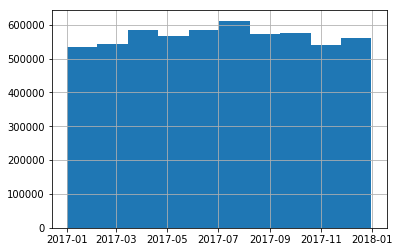

In [196]:
d_bts['FL_DATE'].hist()

# Airports - additional data

In [197]:
dtypes_airports = {
    'Name': 'category'
    ,'City': 'category'
    ,'Country': 'category'
    ,'IATA': 'category'
    ,'ICAO': 'category'
    ,'Timezone': 'category'
    ,'DST': 'category'
    ,'TzTimezone': 'category'
    ,'Type': 'category'
    ,'Source': 'category'}

In [198]:
d_airports = pd.read_csv('../data/airports.csv', dtype=dtypes_airports)
d_airports.shape

(7184, 14)

In [199]:
[d_bts.dtypes, d_airports.dtypes]

[FL_DATE                datetime64[ns]
 CARRIER                      category
 TAIL_NUM                     category
 FL_NUM                          int64
 ORIGIN                       category
 ORIGIN_CITY_NAME             category
 DEST                         category
 DEST_CITY_NAME               category
 CRS_DEP_TIME                    int64
 DEP_TIME                      float64
 DEP_DELAY                     float64
 DEP_DELAY_NEW                 float64
 TAXI_OUT                      float64
 WHEELS_OFF                    float64
 WHEELS_ON                     float64
 TAXI_IN                       float64
 CRS_ARR_TIME                    int64
 ARR_TIME                      float64
 ARR_DELAY                     float64
 ARR_DELAY_NEW                 float64
 CANCELLED                     float64
 CANCELLATION_CODE            category
 DIVERTED                      float64
 CRS_ELAPSED_TIME              float64
 ACTUAL_ELAPSED_TIME           float64
 AIR_TIME                

In [200]:
d = pd.merge(left=d_bts, right=d_airports, how='left', left_on='ORIGIN', right_on='IATA')
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzTimezone,Type,Source
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,ORD,KORD,41.978600,-87.904800,672.0,-6,A,America/Chicago,airport,OurAirports
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,LAS,KLAS,36.080101,-115.152000,2181.0,-8,A,America/Los_Angeles,airport,OurAirports
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,DCA,KDCA,38.852100,-77.037697,15.0,-5,A,America/New_York,airport,OurAirports


In [201]:
d.iloc[0]

FL_DATE                                 2017-01-01 00:00:00
CARRIER                                                  AA
TAIL_NUM                                             N153AA
FL_NUM                                                 1766
ORIGIN                                                  ORD
ORIGIN_CITY_NAME                                Chicago, IL
DEST                                                    DFW
DEST_CITY_NAME                        Dallas/Fort Worth, TX
CRS_DEP_TIME                                            710
DEP_TIME                                                705
DEP_DELAY                                                -5
DEP_DELAY_NEW                                             0
TAXI_OUT                                                 12
WHEELS_OFF                                              717
WHEELS_ON                                               918
TAXI_IN                                                  14
CRS_ARR_TIME                            

In [202]:
d = pd.merge(left=d, right=d_airports, how='left', left_on='DEST', right_on='IATA', suffixes=['_orig','_dest'])
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,IATA_dest,ICAO_dest,Latitude_dest,Longitude_dest,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports


In [203]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [204]:
[d_bts.dtypes, d_airports.dtypes]

[FL_DATE                datetime64[ns]
 CARRIER                      category
 TAIL_NUM                     category
 FL_NUM                          int64
 ORIGIN                       category
 ORIGIN_CITY_NAME             category
 DEST                         category
 DEST_CITY_NAME               category
 CRS_DEP_TIME                    int64
 DEP_TIME                      float64
 DEP_DELAY                     float64
 DEP_DELAY_NEW                 float64
 TAXI_OUT                      float64
 WHEELS_OFF                    float64
 WHEELS_ON                     float64
 TAXI_IN                       float64
 CRS_ARR_TIME                    int64
 ARR_TIME                      float64
 ARR_DELAY                     float64
 ARR_DELAY_NEW                 float64
 CANCELLED                     float64
 CANCELLATION_CODE            category
 DIVERTED                      float64
 CRS_ELAPSED_TIME              float64
 ACTUAL_ELAPSED_TIME           float64
 AIR_TIME                

In [205]:
mem_usage(d)

'2430.69 MB'

In [206]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                         object
ORIGIN_CITY_NAME             category
DEST                           object
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

# Carriers - additional data

In [207]:
# d_carriers = pd.read_csv('../data/CarrierLookup.csv')
# d_carriers.shape

In [208]:
# d = pd.merge(left=d, right=d_carriers, left_on='CARRIER', right_on='Code')
# d[:3]

In [209]:
# d.iloc[0]

In [210]:
dtypes_carriers = {
    'Code': 'category'
    ,'Description': 'category'}

In [211]:
d_carriers_unique = pd.read_csv('../data/UniqueCarrierLookup.csv', dtype=dtypes_carriers)
d_carriers_unique.shape

(1645, 2)

In [212]:
d = pd.merge(left=d, right=d_carriers_unique, left_on='CARRIER', right_on='Code')
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,Latitude_dest,Longitude_dest,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest,Code,Description
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc.
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc.
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports,AA,American Airlines Inc.


In [213]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [214]:
d['CARRIER'].value_counts(dropna=False)

WN    1222518
DL     923560
AA     896348
OO     695899
UA     535187
EV     339541
B6     298654
NK     208638
AS     185068
VX     180988
F9     101075
HA      87145
Name: CARRIER, dtype: int64

In [215]:
mem_usage(d)

'2766.51 MB'

In [216]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                        object
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                         object
ORIGIN_CITY_NAME             category
DEST                           object
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

For some reason (that I could figure out, but I'm not going to spend the time on - something about the join, since the ORIG and DEST fields that we use on the join above are similarly changed) the last join clobbers the categorical dtype on a few of the BTS fields. I'll reapply it here.

In [217]:
for field in dtypes_bts:
    d[field] = d[field].astype(dtypes_bts[field])

In [218]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                       category
ORIGIN_CITY_NAME             category
DEST                         category
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

In [219]:
mem_usage(d)

'1824.92 MB'

In [264]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

# Filter down joined data to only fields we need, rename to be consistent

In [248]:
d_filtered = d[['FL_DATE','ORIGIN','ORIGIN_CITY_NAME','DEST','DEST_CITY_NAME',
                'CRS_DEP_TIME','DEP_TIME','DEP_DELAY','DEP_DELAY_NEW',
                'CRS_ARR_TIME','ARR_TIME','ARR_DELAY','ARR_DELAY_NEW',
                'CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME',
                'Name_orig','Latitude_orig','Longitude_orig',
                'Name_dest','Latitude_dest','Longitude_dest','Description']].copy()
d_filtered[:2]

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,Name_orig,Latitude_orig,Longitude_orig,Name_dest,Latitude_dest,Longitude_dest,Description
0,2017-01-01,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,-5.0,0.0,948,...,0.0,158.0,147.0,Chicago O'Hare International Airport,41.978600,-87.9048,Dallas Fort Worth International Airport,32.896801,-97.038002,American Airlines Inc.
1,2017-01-01,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,0.0,0.0,1718,...,0.0,163.0,162.0,McCarran International Airport,36.080101,-115.1520,Dallas Fort Worth International Airport,32.896801,-97.038002,American Airlines Inc.


In [249]:
d_filtered.rename(columns={'FL_DATE':'FlightDate','ORIGIN':'OriginCode','ORIGIN_CITY_NAME':'OriginCity',
                           'DEST':'DestinationCode','DEST_CITY_NAME':'DestinationCity',
                           'CRS_DEP_TIME':'DepartureTimeScheduled',
                           'DEP_TIME':'DepartureTimeActual','DEP_DELAY':'DepartureDelay',
                           'DEP_DELAY_NEW':'DepartureDelayCapped',
                           'CRS_ARR_TIME':'ArrivalTimeScheduled','ARR_TIME':'ArrivalTimeActual',
                           'ARR_DELAY':'ArrivalDelay',
                           'ARR_DELAY_NEW':'ArrivalDelayCapped','CANCELLED':'Cancelled','DIVERTED':'Diverted',
                           'CRS_ELAPSED_TIME':'TotalTimeScheduled','ACTUAL_ELAPSED_TIME':'TotalTimeActual',
                           'Name_orig':'OriginAirport','Latitude_orig':'OriginLatitude',
                           'Longitude_orig':'OriginLongitude','Name_dest':'DestinationAirport',
                           'Latitude_dest':'DestinationLatitude','Longitude_dest':'DestinationLongitude',
                           'Description':'Carrier'}, inplace=True)
d_filtered.iloc[0]

FlightDate                                    2017-01-01 00:00:00
OriginCode                                                    ORD
OriginCity                                            Chicago, IL
DestinationCode                                               DFW
DestinationCity                             Dallas/Fort Worth, TX
DepartureTimeScheduled                                        710
DepartureTimeActual                                           705
DepartureDelay                                                 -5
DepartureDelayCapped                                            0
ArrivalTimeScheduled                                          948
ArrivalTimeActual                                             932
ArrivalDelay                                                  -16
ArrivalDelayCapped                                              0
Cancelled                                                       0
Diverted                                                        0
TotalTimeS

In [250]:
mem_usage(d_filtered)

'857.11 MB'

# And do a bit more cleanup, for particular fields

Don't need/want carriers to end with 'Inc.' or 'Airlines Inc.', etc.

In [251]:
d_filtered['Carrier'].value_counts(dropna=False)[:14]

Southwest Airlines Co.        1222518
Delta Air Lines Inc.           923560
American Airlines Inc.         896348
SkyWest Airlines Inc.          695899
United Air Lines Inc.          535187
ExpressJet Airlines Inc.       339541
JetBlue Airways                298654
Spirit Air Lines               208638
Alaska Airlines Inc.           185068
Virgin America                 180988
Frontier Airlines Inc.         101075
Hawaiian Airlines Inc.          87145
Continental Air Lines Inc.          0
Corporatejets, XXI                  0
Name: Carrier, dtype: int64

In [252]:
suffixes_to_remove = [' Airlines Co.',' Airlines Inc.',' Airways',' Air Lines',' Inc.']

for suffix in suffixes_to_remove:
    d_filtered['Carrier'] = d_filtered['Carrier'].str.replace(suffix, '')

In [253]:
d_filtered['Carrier'].value_counts(dropna=False)[:15]

Southwest         1222518
Delta              923560
American           896348
SkyWest            695899
United             535187
ExpressJet         339541
JetBlue            298654
Spirit             208638
Alaska             185068
Virgin America     180988
Frontier           101075
Hawaiian            87145
Name: Carrier, dtype: int64

There are a few rows w/ null airport names, which can make filters in Tableau have 'Null' or the like.

In [254]:
sum(d_filtered['OriginAirport'].isnull()), sum(d_filtered['DestinationAirport'].isnull()), len(d_filtered)

(320, 320, 5674621)

In [255]:
d_filtered.dropna(subset=['OriginAirport', 'DestinationAirport'], inplace=True)
sum(d_filtered['OriginAirport'].isnull()), sum(d_filtered['DestinationAirport'].isnull()), len(d_filtered)

(0, 0, 5673981)

We have some rows w/ Dallas and some w/ Dallas/Fort Worth as the city. Is this because we have different airports? Or is it something else? If the former, we probably want to leave it as is (we'll help w/ the addition of the airport code).

In [256]:
d_filtered[d_filtered['OriginCity'] == 'Dallas, TX']['OriginAirport'][:1]

1380273    Dallas Love Field
Name: OriginAirport, dtype: category
Categories (7142, object): [A 511 Airport, A Coruña Airport, Aachen-Merzbrück Airport, Aalborg Airport, ..., Şanlıurfa GAP Airport, Şırnak Şerafettin Elçi Airport, Šiauliai International Airport, Žilina Airport]

In [257]:
d_filtered[d_filtered['OriginCity'] == 'Dallas/Fort Worth, TX']['OriginAirport'][:1]

26    Dallas Fort Worth International Airport
Name: OriginAirport, dtype: category
Categories (7142, object): [A 511 Airport, A Coruña Airport, Aachen-Merzbrück Airport, Aalborg Airport, ..., Şanlıurfa GAP Airport, Şırnak Şerafettin Elçi Airport, Šiauliai International Airport, Žilina Airport]

In [258]:
sum(d_filtered['ArrivalDelay'].isnull()), sum(d_filtered['DepartureDelay'].isnull())

(95210, 80343)

We don't want cancelled and diverted flights, as they don't have good delay data always.

In [259]:
len(d_filtered)

5673981

In [260]:
d_filtered = d_filtered[(d_filtered['Cancelled'] == 0) & (d_filtered['Diverted'] == 0)]
len(d_filtered)

5578772

And we'll also get rid of any where we don't have data - looks like there's just one.

In [261]:
sum(d_filtered['DepartureDelay'].isnull()), sum(d_filtered['ArrivalDelay'].isnull())

(0, 1)

In [262]:
d_filtered.dropna(subset=['DepartureDelay', 'ArrivalDelay'], inplace=True)
sum(d_filtered['DepartureDelay'].isnull()), sum(d_filtered['ArrivalDelay'].isnull()), len(d_filtered)

(0, 0, 5578771)

# And, finally, dump to a single file

In [263]:
d_filtered.to_csv('../data/flights.csv', index=False)

# Separate aggregated data for airport selection

In [265]:
d_filtered.iloc[0]

FlightDate                                    2017-01-01 00:00:00
OriginCode                                                    ORD
OriginCity                                            Chicago, IL
DestinationCode                                               DFW
DestinationCity                             Dallas/Fort Worth, TX
DepartureTimeScheduled                                        710
DepartureTimeActual                                           705
DepartureDelay                                                 -5
DepartureDelayCapped                                            0
ArrivalTimeScheduled                                          948
ArrivalTimeActual                                             932
ArrivalDelay                                                  -16
ArrivalDelayCapped                                              0
Cancelled                                                       0
Diverted                                                        0
TotalTimeS

First, we'll add the fields we don't have and that we'll need in order to group. We've prev done this in Tableau, for the optimal flight stuff, using calculated fields. Now that we need them to aggregate here, we need the fields here.

Why do it here? Tableau's map stuff is really slow when we have ~5 million records.

In [266]:
d_filtered['FlightDateDay'] = d_filtered['FlightDate'].dt.weekday_name
d_filtered['FlightDateDay'].value_counts(dropna=False)

Friday       832394
Thursday     828387
Monday       822903
Wednesday    818366
Tuesday      804876
Sunday       793660
Saturday     678185
Name: FlightDateDay, dtype: int64

In [304]:
d_filtered['DepartureTimeActualHour'] = np.floor(d_filtered['DepartureTimeActual'] / 100)
d_filtered['ArrivalTimeActualHour'] = np.floor(d_filtered['ArrivalTimeActual'] / 100)

In [277]:
d_filtered[['DepartureTimeActual','DepartureTimeActualHour']][:5]

,DepartureTimeActual,DepartureTimeActualHour
0,705.0,7.0
1,1235.0,12.0
2,1015.0,10.0
3,719.0,7.0
4,1011.0,10.0


In [276]:
d_filtered['DepartureTimeActualHour'].value_counts(dropna=False)

6.0     362649
8.0     360317
17.0    353537
7.0     339736
10.0    339107
15.0    336445
12.0    334448
11.0    332883
13.0    325420
9.0     322026
16.0    316412
18.0    309455
14.0    306476
19.0    305585
20.0    271764
5.0     204100
21.0    190072
22.0    151803
23.0     61996
0.0      27901
4.0      11468
1.0      10143
2.0       3056
3.0       1507
24.0       465
Name: DepartureTimeActualHour, dtype: int64

In [305]:
d_filtered.iloc[0]

FlightDate                                     2017-01-01 00:00:00
OriginCode                                                     ORD
OriginCity                                             Chicago, IL
DestinationCode                                                DFW
DestinationCity                              Dallas/Fort Worth, TX
DepartureTimeScheduled                                         710
DepartureTimeActual                                            705
DepartureDelay                                                  -5
DepartureDelayCapped                                             0
ArrivalTimeScheduled                                           948
ArrivalTimeActual                                              932
ArrivalDelay                                                   -16
ArrivalDelayCapped                                               0
Cancelled                                                        0
Diverted                                                      

Now, we can group.

In [299]:
d_agg_origin = d_filtered.groupby(['OriginAirport','OriginCode','OriginCity',
                            'OriginLatitude','OriginLongitude','Carrier',
                            'FlightDateDay','DepartureTimeActualHour']).agg({'DepartureDelay':np.mean}).reset_index()
d_agg_origin[:3]

,OriginAirport,OriginCode,OriginCity,OriginLatitude,OriginLongitude,Carrier,FlightDateDay,DepartureTimeActualHour,DepartureDelay
0,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,4.0,-6.000000
1,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,5.0,1.151515
2,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,6.0,18.333333


In [307]:
for col in d_agg_origin.columns:
    print(f"{col}: {sum(d_agg_origin[col].isnull())}")

OriginAirport: 0
OriginCode: 0
OriginCity: 0
OriginLatitude: 0
OriginLongitude: 0
Carrier: 0
FlightDateDay: 0
DepartureTimeActualHour: 0
DepartureDelay: 0


In [306]:
d_agg_destination = d_filtered.groupby(['DestinationAirport','DestinationCode','DestinationCity',
                            'DestinationLatitude','DestinationLongitude','Carrier',
                            'FlightDateDay','ArrivalTimeActualHour']).agg({'ArrivalDelay':np.mean}).reset_index()
d_agg_destination[:3]

,DestinationAirport,DestinationCode,DestinationCity,DestinationLatitude,DestinationLongitude,Carrier,FlightDateDay,ArrivalTimeActualHour,ArrivalDelay
0,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,0.0,53.0
1,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,2.0,173.5
2,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,12.0,-13.4


In [309]:
for col in d_agg_destination.columns:
    print(f"{col}: {sum(d_agg_destination[col].isnull())}")

DestinationAirport: 0
DestinationCode: 0
DestinationCity: 0
DestinationLatitude: 0
DestinationLongitude: 0
Carrier: 0
FlightDateDay: 0
ArrivalTimeActualHour: 0
ArrivalDelay: 0


Now rename cols to be the same, and produce a row per location, etc. w/ separate fields for departure and arrival delays.

In [310]:
origin_renames = {'OriginAirport':'Airport','OriginCode':'Code','OriginCity':'City',
                  'OriginLatitude':'Latitude','OriginLongitude':'Longitude',
                  'DepartureTimeActualHour':'Hour'}
dest_renames = {'DestinationAirport':'Airport','DestinationCode':'Code','DestinationCity':'City',
                'DestinationLatitude':'Latitude','DestinationLongitude':'Longitude',
                'ArrivalTimeActualHour':'Hour'}
d_agg_origin.rename(columns=origin_renames, inplace=True)
d_agg_destination.rename(columns=dest_renames, inplace=True)

In [311]:
d_agg_origin[:3]

,Airport,Code,City,Latitude,Longitude,Carrier,FlightDateDay,Hour,DepartureDelay
0,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,4.0,-6.000000
1,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,5.0,1.151515
2,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,6.0,18.333333


In [312]:
d_agg_destination[:3]

,Airport,Code,City,Latitude,Longitude,Carrier,FlightDateDay,Hour,ArrivalDelay
0,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,0.0,53.0
1,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,2.0,173.5
2,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,12.0,-13.4


In [320]:
d_agg = pd.merge(left=d_agg_origin, right=d_agg_destination, how='outer')
d_agg[:10]

,Airport,Code,City,Latitude,Longitude,Carrier,FlightDateDay,Hour,DepartureDelay,ArrivalDelay
0,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,4.0,-6.000000,NaN
1,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,5.0,1.151515,NaN
2,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,6.0,18.333333,NaN
3,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,7.0,136.000000,NaN
4,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,8.0,63.000000,NaN
5,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,9.0,274.000000,NaN
6,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,12.0,-11.333333,-13.400000
7,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,13.0,0.609756,35.333333
8,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,14.0,243.333333,84.000000
9,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,16.0,342.000000,NaN


In [318]:
d_agg[(d_agg['Code'] == 'ABR') & (d_agg['Carrier'] == 'SkyWest') & (d_agg['Hour'] == 2)]

,Airport,Code,City,Latitude,Longitude,Carrier,FlightDateDay,Hour,DepartureDelay,ArrivalDelay
127695,Aberdeen Regional Airport,ABR,"Aberdeen, SD",45.4491,-98.421799,SkyWest,Friday,2.0,NaN,173.5


In [321]:
d_agg.to_csv('../data/airport_delays.csv', index=False)

# First cut, paths for maps linking airports

In [68]:
d_paths_data = d.groupby(['ORIGIN','DEST','ORIGIN_CITY_NAME','DEST_CITY_NAME',
           'Name_orig','Name_dest',
           'Latitude_orig','Longitude_orig',
           'Latitude_dest','Longitude_dest'], as_index=True).size().reset_index()
d_paths_data.rename(columns={0:'CountOfFlights'}, inplace=True)
d_paths_data[:5]

,ORIGIN,DEST,ORIGIN_CITY_NAME,DEST_CITY_NAME,Name_orig,Name_dest,Latitude_orig,Longitude_orig,Latitude_dest,Longitude_dest,CountOfFlights
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",Lehigh Valley International Airport,Hartsfield Jackson Atlanta International Airport,40.652100,-75.440804,33.636700,-84.428101,128
1,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",Lehigh Valley International Airport,Detroit Metropolitan Wayne County Airport,40.652100,-75.440804,42.212399,-83.353401,113
2,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",Lehigh Valley International Airport,Chicago O'Hare International Airport,40.652100,-75.440804,41.978600,-87.904800,78
3,ABI,DFW,"Abilene, TX","Dallas/Fort Worth, TX",Abilene Regional Airport,Dallas Fort Worth International Airport,32.411301,-99.681900,32.896801,-97.038002,41
4,ABQ,ATL,"Albuquerque, NM","Atlanta, GA",Albuquerque International Sunport Airport,Hartsfield Jackson Atlanta International Airport,35.040199,-106.609001,33.636700,-84.428101,94


In [86]:
foo = list(d_paths_data[:1].itertuples(index=False))
foo

[Pandas(ORIGIN='ABE', DEST='ATL', ORIGIN_CITY_NAME='Allentown/Bethlehem/Easton, PA', DEST_CITY_NAME='Atlanta, GA', Name_orig='Lehigh Valley International Airport', Name_dest='Hartsfield Jackson Atlanta International Airport', Latitude_orig=40.652099609375, Longitude_orig=-75.44080352783203, Latitude_dest=33.63669967651367, Longitude_dest=-84.4281005859375, CountOfFlights=128)]

In [92]:
foo[0].ORIGIN

'ABE'

In [127]:
d_path_rows = []
for index, flight in enumerate(d_paths_data.itertuples(index=False)):
    path_id = f'{flight.ORIGIN}-{flight.DEST}'
    origin = {'PathId':path_id, 'IATA':flight.ORIGIN, 'City':flight.ORIGIN_CITY_NAME, 
              'Airport':flight.Name_orig, 'Latitude':flight.Latitude_orig, 
              'Longitude':flight.Longitude_orig, 'CountOfFlights':flight.CountOfFlights,
              'PointOrder':0}
    dest = {'PathId':path_id, 'IATA':flight.DEST, 'City':flight.DEST_CITY_NAME, 
            'Airport':flight.Name_dest, 'Latitude':flight.Latitude_dest, 
            'Longitude':flight.Longitude_dest, 'CountOfFlights':0,
            'PointOrder':1}
    d_path_rows.append(origin)
    d_path_rows.append(dest)
    
d_paths = pd.DataFrame(d_path_rows)

In [128]:
d_paths[:4]

,Airport,City,CountOfFlights,IATA,Latitude,Longitude,PathId,PointOrder
0,Lehigh Valley International Airport,"Allentown/Bethlehem/Easton, PA",128,ABE,40.652100,-75.440804,ABE-ATL,0
1,Hartsfield Jackson Atlanta International Airport,"Atlanta, GA",0,ATL,33.636700,-84.428101,ABE-ATL,1
2,Lehigh Valley International Airport,"Allentown/Bethlehem/Easton, PA",113,ABE,40.652100,-75.440804,ABE-DTW,0
3,Detroit Metropolitan Wayne County Airport,"Detroit, MI",0,DTW,42.212399,-83.353401,ABE-DTW,1


In [129]:
d_paths.to_csv('../data/flight_paths.csv', index=False)